In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading the data

In [2]:
df = pd.read_csv("dataset/CarBuyers.csv")
df.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


## Data Preprocessing

In [3]:
#to get the number of rows and columns
df.shape

(6092, 11)

In [4]:
#to count all unique manufactureres
df['Manufacturer'].value_counts()

Ford            355
Peugeot         312
Toyota          308
Audi            293
Fiat            288
Volkswagen      278
Mercedes        262
Nissan          259
Volvo           253
Renault         242
Honda           239
Mazda           231
Citroen         207
BMW             204
Hyundai         193
Suzuki          186
Mitsubishi      158
Kia             152
Alfa-Romeo      148
Seat            140
Porsche         114
Skoda           113
Rover           101
Land-Rover       96
Subaru           86
Saab             81
Jaguar           75
Chrysler         71
Daewoo           64
Daihatsu         62
Chevrolet        55
MG               50
Opel             48
Smart            39
Lotus            31
Aston-Martin     31
Lancia           29
Ssangyong        29
Triumph          26
Datsun           24
Daimler          24
Mini             23
Lada             22
Dodge            18
Lexus            17
Morris           15
TVR              11
Ferrari          10
Bentley          10
Abarth            4


In [5]:
#to check if there are any null values or not
df.isnull().sum()

Manufacturer    0
Model           0
Price           0
Transmission    0
Power           0
Engine CC       0
Fuel            0
Male            0
Female          0
Unknown         0
Total           0
dtype: int64

In [6]:
#we see that most of the values in rows are duplicate only the number of buyers are different, so to get the count:
df[df.duplicated(['Manufacturer','Model','Transmission', 'Power', 'Engine CC','Fuel'])].count()

Manufacturer    5590
Model           5590
Price           5590
Transmission    5590
Power           5590
Engine CC       5590
Fuel            5590
Male            5590
Female          5590
Unknown         5590
Total           5590
dtype: int64

In [7]:
#we will make the number of buyers(male, female, unknown, total) values into integer
def to_integer(x):
    return(int(x.replace(',','')))

In [8]:
for col in ['Male', 'Female', 'Unknown', 'Total']:
    df[col]= df[col].map(to_integer)

In [9]:
#now lets add up all the buyer values so that we get only unique values for other columns
df= df.groupby(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC','Fuel'],
               as_index=False).sum()

In [10]:
#to fill values=0 in the colums with their mean values
df.replace(0,df.mean(axis=0),inplace=True)

C:\Users\Kamini\AppData\Local\Temp\ipykernel_12688\4271231753.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.replace(0,df.mean(axis=0),inplace=True)


In [11]:
df.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Abarth,500C,21.105625,5.000000,60.625000,1039.500000,petrol,7124,4719,570,12413
1,Alfa-Romeo,145,17.427143,5.000000,87.714286,1696.428571,petrol,29993,11855,2186,44034
2,Alfa-Romeo,146,18.198429,5.000000,87.714286,1696.428571,petrol,40928,14231,2969,58128
3,Alfa-Romeo,147,25.343387,5.193548,95.096774,1802.774194,petrol,149499,83501,13278,246278
4,Alfa-Romeo,155,23.909333,5.000000,100.666667,2016.777778,petrol,28860,4422,1191,34473


In [12]:
df.shape
#after removing the dupliacte rows we are left with only 502 rows

(502, 11)

In [13]:
#saving the cleaning data frame into csv to extract other stats in future
df.to_csv('Cars_cleaned_data.csv')

In [14]:
df['Manufacturer'].value_counts()

Peugeot         31
Audi            24
Ford            24
Fiat            23
Renault         23
Volkswagen      23
Toyota          23
Nissan          22
Hyundai         19
Citroen         18
Mercedes        17
Honda           17
Volvo           17
Mazda           16
BMW             15
Suzuki          13
Kia             13
Skoda           12
Alfa-Romeo      12
Seat            11
Mitsubishi       9
Chevrolet        9
Porsche          8
Opel             7
Rover            6
Subaru           6
Jaguar           6
Chrysler         6
Saab             5
Daihatsu         5
Mini             5
Smart            4
Ssangyong        4
MG               4
Land-Rover       4
Lancia           4
Daewoo           4
Lexus            3
Dodge            3
Datsun           3
Daimler          3
Aston-Martin     3
Lada             3
TVR              2
Triumph          2
Lotus            2
Morris           2
Ferrari          2
Dacia            2
Maserati         1
Bentley          1
Abarth           1
Name: Manufa

In [15]:
#to predict the price of a car, we don't need the model, male, female, unknown and total columns so lets drop them
final_df=df[['Manufacturer','Transmission','Power','Engine CC','Fuel','Price']]

In [16]:
final_df.head()

,Manufacturer,Transmission,Power,Engine CC,Fuel,Price
0,Abarth,5.000000,60.625000,1039.500000,petrol,21.105625
1,Alfa-Romeo,5.000000,87.714286,1696.428571,petrol,17.427143
2,Alfa-Romeo,5.000000,87.714286,1696.428571,petrol,18.198429
3,Alfa-Romeo,5.193548,95.096774,1802.774194,petrol,25.343387
4,Alfa-Romeo,5.000000,100.666667,2016.777778,petrol,23.909333


### Visualization of depent variables: Price

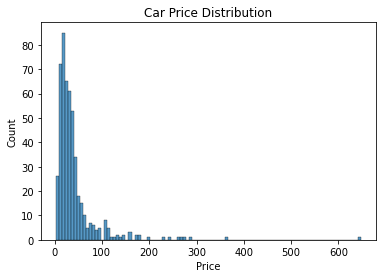

In [17]:
plt.title('Car Price Distribution')
sns.histplot(df.Price)
plt.show()

### Visualization of independent variables

#### Price V/S Transmission, Power, Engine CC

In [18]:
y_vars=['Price']

In [19]:
x_vars=['Transmission', 'Power', 'Engine CC']

In [20]:
import scipy
from scipy.stats import pearsonr

def pair_plot(x_axis,y_axis) :
    sns.pairplot(df,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

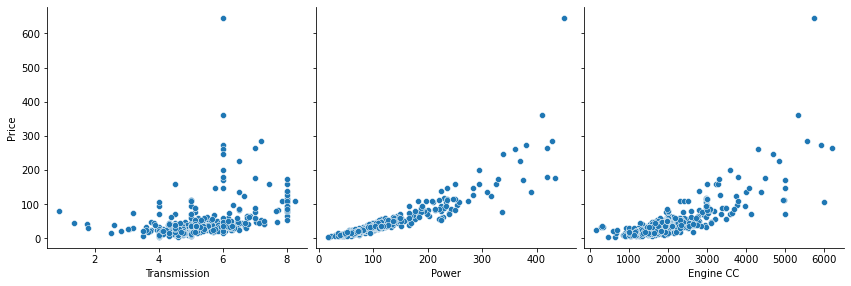


Coefficient of Correlation between Price and Transmission: 40.51656467805692 %
Correlation coefficient between Price and Power: 87.55054212592577 %
Correlation coefficient between Price and Engine CC:  78.05703229912237 %


In [21]:
pair_plot(x_vars,y_vars)
p1=df['Transmission']
p2=df['Power']
p3=df['Engine CC']

pearson_coeff, p_value = pearsonr(p1,df['Price'])
print('\nCoefficient of Correlation between Price and Transmission:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,df['Price'])
print('Correlation coefficient between Price and Power:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,df['Price'])
print('Correlation coefficient between Price and Engine CC: ',pearson_coeff*100,'%')

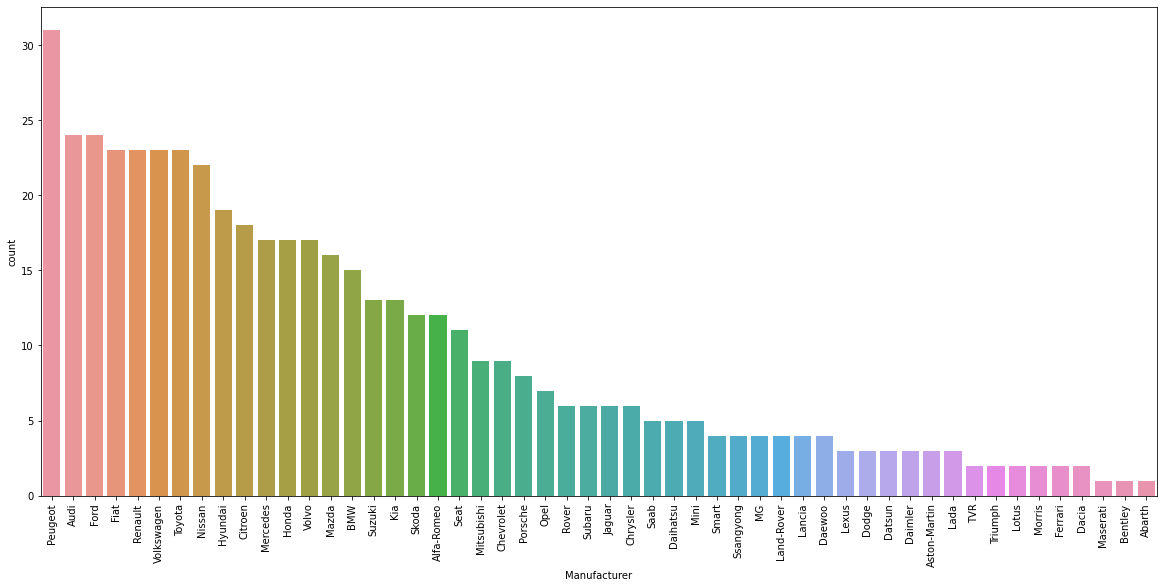

In [22]:
plt.figure(figsize=(20,9))

plt.xticks(rotation = 90)
order = df['Manufacturer'].value_counts(ascending=False).index
sns.countplot(x='Manufacturer', data=df, order=order)

plt.show()

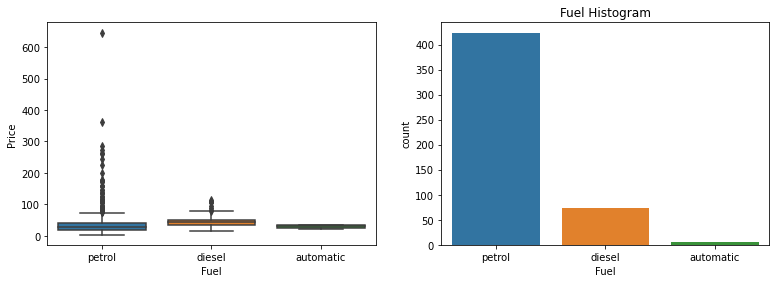

In [23]:
plt.figure(figsize=(20, 9))

plt.subplot(2,3,1)
sns.boxplot(x = 'Fuel', y = 'Price', data = df)

plt.subplot(2,3,2)
plt.title('Fuel Histogram')
order = df['Fuel'].value_counts(ascending=False).index
sns.countplot(x='Fuel', data=df, order=order)

plt.show()

In [24]:
#average  price of diesel and Petrol cars is same, except for existense the outliners in petrol

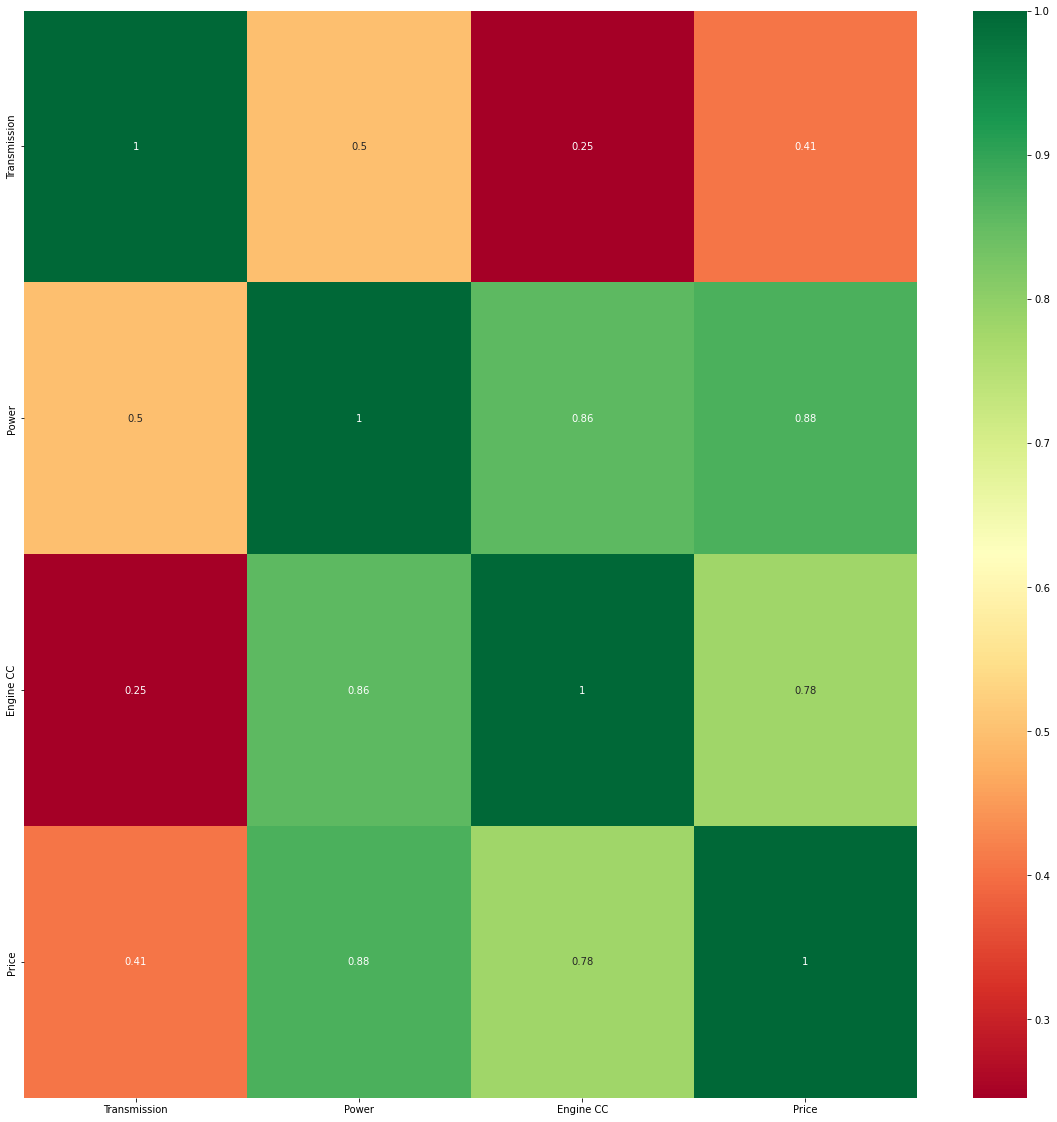

In [25]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
#one hot-encoding
final_df=pd.get_dummies(final_df,drop_first=True)


In [27]:
final_df.head()

,Transmission,Power,Engine CC,Price,Manufacturer_Alfa-Romeo,Manufacturer_Aston-Martin,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,...,Manufacturer_Ssangyong,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_TVR,Manufacturer_Toyota,Manufacturer_Triumph,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_diesel,Fuel_petrol
0,5.000000,60.625000,1039.500000,21.105625,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.000000,87.714286,1696.428571,17.427143,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5.000000,87.714286,1696.428571,18.198429,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5.193548,95.096774,1802.774194,25.343387,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5.000000,100.666667,2016.777778,23.909333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
first_column = final_df.pop('Price')
final_df.insert(0, 'Price', first_column)

In [29]:
X=final_df.iloc[:,1:]
y=final_df.iloc[:,0]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
regressor.score(X_test,y_test)

0.8732831478565446

In [33]:
#scores of training data and test data 
from sklearn.metrics import r2_score
display(r2_score(y_train,regressor.predict(X_train)),r2_score(y_test,regressor.predict(X_test)))

0.8206322380613967

0.8732831478565446

In [34]:
#K Fold Cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87328315, 0.93795186])

In [35]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Kamini\.conda\envs\car_sales\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Kamini\.conda\envs\car_sales\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline imp

,model,best_score,best_params
0,Linear_regression,0.905618,{'normalize': False}
1,Lasso,0.853018,"{'alpha': 1, 'selection': 'random'}"
2,Decision_tree,0.866575,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [36]:
import pickle
with open('carsales.pickle','wb') as f:
    pickle.dump(regressor,f) 